<a href="https://colab.research.google.com/github/ihaseebmohammed/PySpark-Projects/blob/master/Airlines_data_Pyspark_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Airlines Data - PySpark Project**

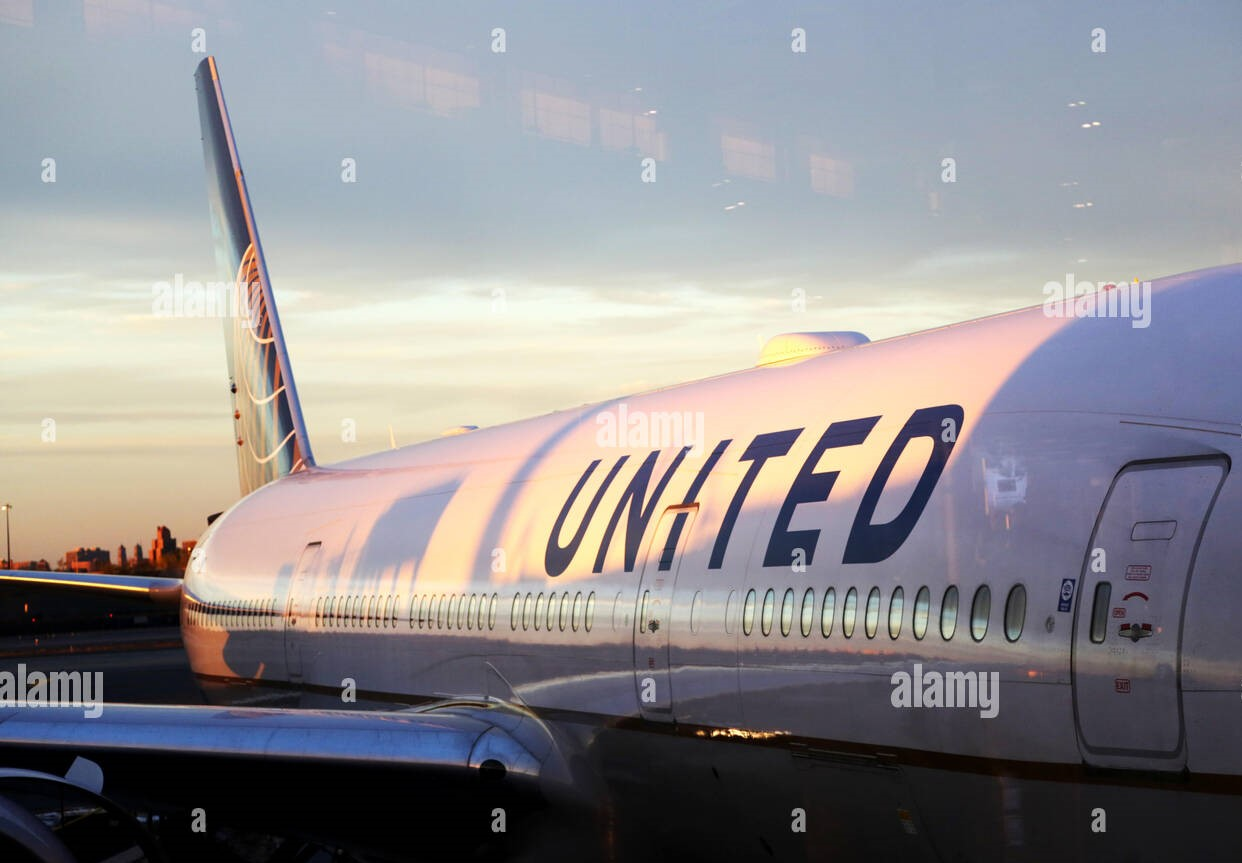

####According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded. 
####The report, focusing on data from year 1989, estimated that air transportation delays put a  dent in the country's gross domestic product that year. 
####But, what are the causes for these delays?
####In order to answer this question, we are going to analyze the provided dataset, containing up to 426 different internal flights in the US for 1989 and their causes for delay, diversion and cancellation; if any.
####The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).

###Dimension of the Dataframe is: **(426, 30)**
###Number of Rows are: **426**
###Number of Columns are: **30**

###**This dataset is composed by the following variables:**
####1)Year 2008
####2)Month 1-12
####3)DayofMonth 1-31
####4)DayOfWeek 1 (Monday) - 7 (Sunday)
####5)DepTime actual departure time (local, hhmm)
####6)CRSDepTime scheduled departure time (local, hhmm)
####7)ArrTime actual arrival time (local, hhmm)
####8)CRSArrTime scheduled arrival time (local, hhmm)
####9)UniqueCarrier unique carrier code
####10)FlightNum flight number
####11)TailNum plane tail number: aircraft registration, unique aircraft identifier
####12)ActualElapsedTime in minutes
####13)CRSElapsedTime in minutes
####14)AirTime in minutes
####15)ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS)####16)DepDelay departure delay, in minutes
####17)Origin origin IATA airport code
####18)Dest destination IATA airport code
####19)Distance in miles
####20)TaxiIn taxi in time, in minutes
####21)TaxiOut taxi out time in minutes
####22)Cancelled *was the flight cancelled
####23)CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
####24)Diverted 1 = yes, 0 = no
####25)CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
####26)WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
####27)NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
####28)SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
####29)LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


In [1]:
pip install pyspark  #Installing pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 51.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=b10d321be0b91490997c079ad346a5431916a57d8943ae50c55e88872e89ab39
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [24]:
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/Airline_data.csv") 
#Reading the csv file of the data

In [4]:
row = df.count() #total number of rows in dataframe
#extracting number of columns from the Dataframe
column = len(df.columns) #total number of columns in dataframe
#printing
print(f'Dimension of the Dataframe is: {(row,column)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {column}')

Dimension of the Dataframe is: (426, 29)
Number of Rows are: 426
Number of Columns are: 29


In [5]:
from pyspark.sql import functions as F
# initializing sql functions

In [6]:
from pyspark.sql.functions import sum, col, desc, asc, count
# initializing sql aggregate functions

###1) Show a sample of 5 records from dataset.

In [7]:
df.show(5) #to show the sample 5 records

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1552|           UA|      183

###2) Read the data with data types.

In [8]:
df.printSchema() #gives the datatypes of all the columns

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |

#### All the columns have null values and all the columns are of apropriate data types.

###3) Make a new column MonthStr, Which has months in form of 01, 02, 03, ..., 12.

In [9]:
from pyspark.sql.functions import udf, col #importing pyspark sql functions for analysis


In [10]:
from pyspark.sql.functions import sum, col, desc, asc, count, avg #importing key functions for the analysis

In [11]:
def MonthStr(Month): #Defining the function
  Month1 = "0"+str(Month) #converitng month to string to add '0'
  return Month1

In [26]:
a= udf(MonthStr) #applying udf
df1=df.withColumn("MonthStr",a(col("Month"))) #adding a new column 'MonthlyStr' 
df1.show() #showing the result

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|MonthStr|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1

###4) Find the Number of flights each airline made.

In [27]:
df_num_flights= df.select("UniqueCarrier").distinct().show() #Checking unique values in the column

+-------------+
|UniqueCarrier|
+-------------+
|           UA|
+-------------+



In [14]:
from pyspark.sql.functions import sum, col, desc, asc, count, avg #importing functions required for analysis

In [31]:
df_num_flights_2 = df.groupBy("UniqueCarrier").agg(count("FlightNum")).alias("Flight_count") 
df_num_flights_2.show()
#grouping Unique Carrier wise data
#adding all the flights with the above carrier
#naming the column for better understanding

+-------------+----------------+
|UniqueCarrier|count(FlightNum)|
+-------------+----------------+
|           UA|             426|
+-------------+----------------+



####There is only **one** flight carrier **United Airlines** operating with total of **426** flights.

###5) Find the mean departure delay per origination airport.

In [17]:
from pyspark.sql.functions import explode, col, udf, mean as _mean

In [32]:
df_arrival_delay= df.groupBy("Origin").agg(avg("ArrDelay").alias("Mean_Arrival_delay")).sort(asc("Mean_Arrival_delay"))
df_arrival_delay.show()
#grouping the data based on origin
#calculating average of the arrival delay
#naming the new 
#arranging in ascending order

+------+-------------------+
|Origin| Mean_Arrival_delay|
+------+-------------------+
|   LIH|0.16666666666666666|
|   PHL|  6.827586206896552|
|   EWR|               9.25|
|   SFO| 11.215384615384615|
|   IAD| 12.966666666666667|
|   HNL|  14.21774193548387|
|   OGG|  16.24137931034483|
|   DEN| 20.166666666666668|
+------+-------------------+



####**Interpretions:**
####* From the above table we can infer that Lihui Airport has the least mean arrival delay of flights and the flights are on time often
Reason: As it is based on a small island in Hawaii the flights are very less compared to other states and also because of low population comprising of tourists. Hence there is less delay in arrival. This airport does not serve as a hub for any airline carrier
####* The Denver Airport has the maximum mean arrival delay of the flights.
Reason: It is the largest airport in North America and second largest in the world. There are numerous airlines operating and due to this large number of airlines frequent this airport

###6) What is the average departure delay from each airport?

In [33]:
df_departure_delay= df.groupBy("Origin").agg(avg("DepDelay").alias("Mean_Departure_delay")).sort(asc("Mean_Departure_delay"))
df_departure_delay.show()
#grouping the data based on origin
#finding the average of the Departure delay
#naming the new column
#arranging in ascending order

+------+--------------------+
|Origin|Mean_Departure_delay|
+------+--------------------+
|   LIH| -3.7666666666666666|
|   HNL|   3.217741935483871|
|   EWR|   4.958333333333333|
|   OGG|                 6.0|
|   IAD|                 8.9|
|   PHL|  16.137931034482758|
|   SFO|  19.646153846153847|
|   DEN|                27.6|
+------+--------------------+



####**Interpretations:**
####* The Lihue Airport has the least departure delays of the flights
Reason: As it is based on a small island in Hawaii the flights are very less compared to other states and also because of low population comprising of tourists. Hence there is less delay in departure. This airport does not serve as a hub for any airline carrier
####* The Denver Aiport has the highest departure delay of the flights
Reason: It is the largest airport in North America and second largest in the world. There are numerous airlines operating and due to this large number of airlines frequent this airport. Hence the departure time gets delayed due to heavy traffic of various airlines operating.